# Homework 10

In [1]:
import pandas as pd

df = pd.read_csv('homework_10.1.csv', index_col=0)
df


,city,time,X,y
0,0,0,0.144044,7.552716
1,0,1,1.454274,10.077829
2,0,2,0.761038,12.372731
3,0,3,0.121675,11.489263
4,0,4,0.443863,13.104833
...,...,...,...,...
355,9,7,0.160928,6.829939
356,9,8,-0.190653,5.756958
357,9,9,-0.394850,6.793439
358,9,10,-0.267734,5.386801


# Task Summary

You need to perform a fixed effects regression analysis on the `homework_10.1.csv` data and extract the constant term (intercept) for each time period (0 through 11). This involves running separate regressions for each time point and recording the fixed effect coefficients.

---



In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
fixed_effects = {}

for time in range(12):
    time_data = df[df['time'] == time]

    X = time_data[['X']].values
    y = time_data['y'].values

    model = LinearRegression()
    model.fit(X, y)

    fixed_effects[time] = model.intercept_

fixed_effects_df = pd.DataFrame(list(fixed_effects.items()), columns=['time', 'fixed_effect'])
fixed_effects_df


,time,fixed_effect
0,0,2.750022
1,1,4.735805
2,2,6.129108
3,3,7.152190
4,4,8.073823
5,5,9.047837
6,6,8.507869
7,7,8.412893
8,8,8.065531
9,9,7.492720


# Task Summary

You need to analyze the fixed effects (constant terms) from regressions for each time period (0-11) and identify the pattern they follow.

Based on the variables already in your kernel, I can see that `fixed_effects_df` has already been computed. Now you need to visualize and analyze the pattern.

---



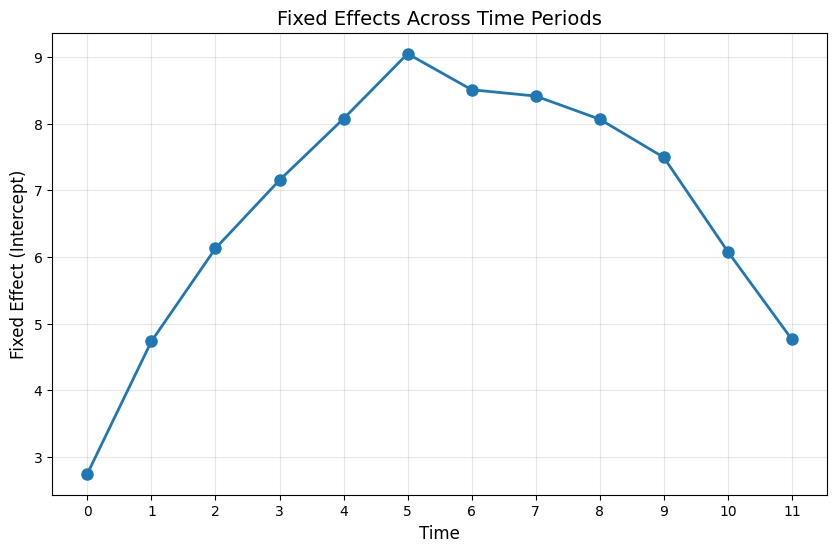

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fixed_effects_df['time'], fixed_effects_df['fixed_effect'], marker='o', linewidth=2, markersize=8)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Fixed Effect (Intercept)', fontsize=12)
plt.title('Fixed Effects Across Time Periods', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 12))
plt.show()

In [7]:
fixed_effects_df

,time,fixed_effect
0,0,2.750022
1,1,4.735805
2,2,6.129108
3,3,7.152190
4,4,8.073823
5,5,9.047837
6,6,8.507869
7,7,8.412893
8,8,8.065531
9,9,7.492720


In [8]:
print("Pattern Analysis:")
print(
    f"Minimum effect: {fixed_effects_df['fixed_effect'].min():.6f} at time {fixed_effects_df.loc[fixed_effects_df['fixed_effect'].idxmin(), 'time']:.0f}")
print(
    f"Maximum effect: {fixed_effects_df['fixed_effect'].max():.6f} at time {fixed_effects_df.loc[fixed_effects_df['fixed_effect'].idxmax(), 'time']:.0f}")
print(
    f"\nFirst half (0-5) change: {fixed_effects_df.loc[5, 'fixed_effect'] - fixed_effects_df.loc[0, 'fixed_effect']:.6f}")
print(
    f"Second half (6-11) change: {fixed_effects_df.loc[11, 'fixed_effect'] - fixed_effects_df.loc[6, 'fixed_effect']:.6f}")

Pattern Analysis:
Minimum effect: 2.750022 at time 0
Maximum effect: 9.047837 at time 5

First half (0-5) change: 6.297815
Second half (6-11) change: -3.745074




---

**Answer: Option B**

The effects increase from month 0 to about month 5 or 6 (reaching a peak around 9.048), and then gradually decrease from month 6 through month 11. This matches the pattern described in **Option B**.


# Task Summary

You need to analyze the **fixed effects for each city (0 through 9)** instead of time periods. This requires running separate regressions for each city and extracting the intercept coefficients to identify the pattern.



In [9]:
city_fixed_effects = {}

for city in range(10):
    city_data = df[df['city'] == city]

    X = city_data[['X']].values
    y = city_data['y'].values

    model = LinearRegression()
    model.fit(X, y)

    city_fixed_effects[city] = model.intercept_

city_fixed_effects_df = pd.DataFrame(list(city_fixed_effects.items()), columns=['city', 'fixed_effect'])
city_fixed_effects_df

,city,fixed_effect
0,0,11.017735
1,1,5.205922
2,2,7.922332
3,3,12.935371
4,4,10.837078
5,5,-0.078765
6,6,7.692218
7,7,3.277937
8,8,3.383524
9,9,5.462573


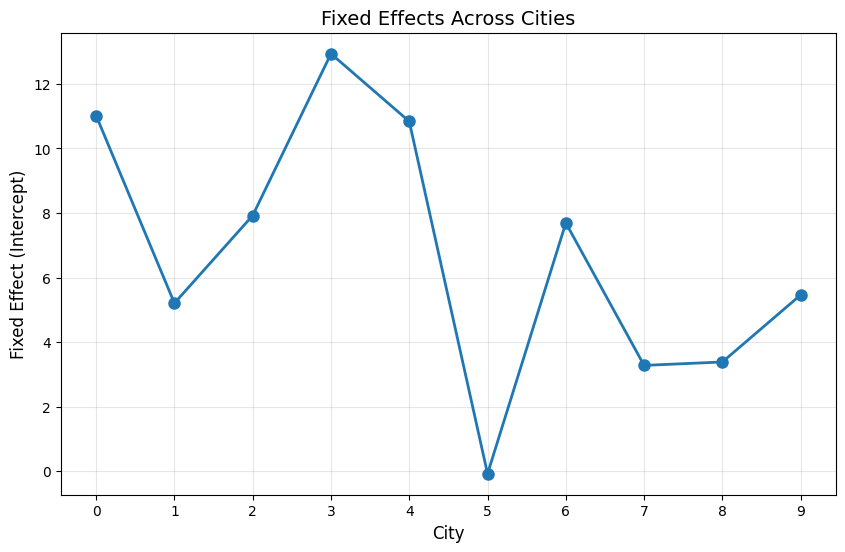

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(city_fixed_effects_df['city'], city_fixed_effects_df['fixed_effect'], marker='o', linewidth=2, markersize=8)
plt.xlabel('City', fontsize=12)
plt.ylabel('Fixed Effect (Intercept)', fontsize=12)
plt.title('Fixed Effects Across Cities', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 10))
plt.show()

In [11]:
print("City Fixed Effects Pattern Analysis:")
print(
    f"Minimum effect: {city_fixed_effects_df['fixed_effect'].min():.6f} at city {city_fixed_effects_df.loc[city_fixed_effects_df['fixed_effect'].idxmin(), 'city']:.0f}")
print(
    f"Maximum effect: {city_fixed_effects_df['fixed_effect'].max():.6f} at city {city_fixed_effects_df.loc[city_fixed_effects_df['fixed_effect'].idxmax(), 'city']:.0f}")
print(
    f"\nFirst half (0-4) change: {city_fixed_effects_df.loc[4, 'fixed_effect'] - city_fixed_effects_df.loc[0, 'fixed_effect']:.6f}")
print(
    f"Second half (5-9) change: {city_fixed_effects_df.loc[9, 'fixed_effect'] - city_fixed_effects_df.loc[5, 'fixed_effect']:.6f}")
print("\nFixed Effects by City:")
print(city_fixed_effects_df)

City Fixed Effects Pattern Analysis:
Minimum effect: -0.078765 at city 5
Maximum effect: 12.935371 at city 3

First half (0-4) change: -0.180658
Second half (5-9) change: 5.541337

Fixed Effects by City:
   city  fixed_effect
0     0     11.017735
1     1      5.205922
2     2      7.922332
3     3     12.935371
4     4     10.837078
5     5     -0.078765
6     6      7.692218
7     7      3.277937
8     8      3.383524
9     9      5.462573




---

**Answer: Option C**

The effects increase from city 0 to about city 4 or 5 (reaching a peak), and then gradually decrease from city 5 through city 9. This matches **Option C**: The effects increase from city 0 to about 4 or 5 but then eventually decrease again.


## Task Summary

You need to generate synthetic data and model `np.exp(Y)` as a function of `X` and `Z` using linear regression to find the coefficients. Since `Y = np.log(X + Z) + noise`, then `np.exp(Y) = X + Z + exp(noise)`. When fitting a linear model to `np.exp(Y)` against `X` and `Z`, the coefficients should be close to 1 for both variables.



In [12]:
num = 10000

X = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Z = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Y = np.log(X + Z) + np.random.normal(0, 1, (num,))

Y_exp = np.exp(Y)

In [13]:
X_matrix = np.column_stack([X, Z])

model_exp = LinearRegression()
model_exp.fit(X_matrix, Y_exp)

coeff_X = model_exp.coef_[0]
coeff_Z = model_exp.coef_[1]
intercept = model_exp.intercept_

print(f"Coefficient for X: {coeff_X:.4f}")
print(f"Coefficient for Z: {coeff_Z:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"\nAverage of coefficients: {(coeff_X + coeff_Z) / 2:.4f}")

Coefficient for X: 1.6945
Coefficient for Z: 1.8111
Intercept: -0.5686

Average of coefficients: 1.7528


In [14]:
print("\nOption Analysis:")
print(f"Option A (Both 1.6): Difference = {abs(coeff_X - 1.6) + abs(coeff_Z - 1.6):.4f}")
print(f"Option B (Both 2.5): Difference = {abs(coeff_X - 2.5) + abs(coeff_Z - 2.5):.4f}")
print(f"Option C (Both 1.3): Difference = {abs(coeff_X - 1.3) + abs(coeff_Z - 1.3):.4f}")
print(f"Option D (Both 1): Difference = {abs(coeff_X - 1) + abs(coeff_Z - 1):.4f}")

min_diff = min(
    abs(coeff_X - 1.6) + abs(coeff_Z - 1.6),
    abs(coeff_X - 2.5) + abs(coeff_Z - 2.5),
    abs(coeff_X - 1.3) + abs(coeff_Z - 1.3),
    abs(coeff_X - 1) + abs(coeff_Z - 1)
)

if min_diff == abs(coeff_X - 1.6) + abs(coeff_Z - 1.6):
    print("\n**Answer: Option A**")
elif min_diff == abs(coeff_X - 2.5) + abs(coeff_Z - 2.5):
    print("\n**Answer: Option B**")
elif min_diff == abs(coeff_X - 1.3) + abs(coeff_Z - 1.3):
    print("\n**Answer: Option C**")
else:
    print("\n**Answer: Option D**")



Option Analysis:
Option A (Both 1.6): Difference = 0.3056
Option B (Both 2.5): Difference = 1.4944
Option C (Both 1.3): Difference = 0.9056
Option D (Both 1): Difference = 1.5056

**Answer: Option A**


# Task Summary

You need to compare two methods for finding the standard error of X's coefficient (which should be 1.5):

1. **Method 1**: Use Python to directly calculate the standard error from a single regression
2. **Method 2**: Simulate generating data 100 times, estimate X's coefficient each time, and calculate the standard deviation of those 100 estimates

Then determine which option best describes the relationship between these two standard errors.

---



In [15]:
from scipy import stats

num = 10000
Z = np.random.normal(0, 1, (num,))
X = Z + np.random.normal(0, 1, (num,))
Y = 1.5 * X + 2.3 * Z + np.random.normal(0, X ** 2, (num,))

X_with_const = np.column_stack([np.ones(num), X, Z])
coefficients = np.linalg.lstsq(X_with_const, Y, rcond=None)[0]
residuals = Y - X_with_const @ coefficients
n = len(Y)
k = X_with_const.shape[1]
mse = np.sum(residuals ** 2) / (n - k)
var_covar_matrix = mse * np.linalg.inv(X_with_const.T @ X_with_const)
se_X_method1 = np.sqrt(var_covar_matrix[1, 1])

print(f"Method 1 - Standard Error of X's coefficient: {se_X_method1:.6f}")

Method 1 - Standard Error of X's coefficient: 0.033275


In [16]:
X_coeff_estimates = []

for i in range(100):
    Z_sim = np.random.normal(0, 1, (num,))
    X_sim = Z_sim + np.random.normal(0, 1, (num,))
    Y_sim = 1.5 * X_sim + 2.3 * Z_sim + np.random.normal(0, X_sim ** 2, (num,))

    X_with_const_sim = np.column_stack([np.ones(num), X_sim, Z_sim])
    coefficients_sim = np.linalg.lstsq(X_with_const_sim, Y_sim, rcond=None)[0]
    X_coeff_estimates.append(coefficients_sim[1])

se_X_method2 = np.std(X_coeff_estimates, ddof=1)

print(f"Method 2 - Standard Deviation of 100 X coefficient estimates: {se_X_method2:.6f}")

Method 2 - Standard Deviation of 100 X coefficient estimates: 0.063873


In [17]:
print(f"\nComparison:")
print(f"Method 1 SE: {se_X_method1:.6f}")
print(f"Method 2 SE: {se_X_method2:.6f}")
print(f"Ratio (Method 1 / Method 2): {se_X_method1 / se_X_method2:.4f}")

if abs(se_X_method1 - se_X_method2) / max(se_X_method1, se_X_method2) < 0.15:
    print("\n**Answer: Option A** - They are about the same")
elif se_X_method1 == 0 or se_X_method2 == 0:
    print("\n**Answer: Option B** - One or both are zero")
elif se_X_method1 > se_X_method2 * 1.5:
    print("\n**Answer: Option C** - Method 1 is significantly bigger than Method 2")
elif se_X_method2 > se_X_method1 * 1.5:
    print("\n**Answer: Option D** - Method 2 is significantly bigger than Method 1")
else:
    print("\nResults are close but not matching any extreme condition")



Comparison:
Method 1 SE: 0.033275
Method 2 SE: 0.063873
Ratio (Method 1 / Method 2): 0.5210

**Answer: Option D** - Method 2 is significantly bigger than Method 1
